In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

import plotly.graph_objects as go
from scipy.optimize import curve_fit
import math as m

import itertools as it

In [2]:
data = {}


# World Bank data

In [3]:

# ----------------------------------------------------
# Data related to gdp 
# ----------------------------------------------------

#Data are in "Annual percentage growth rate of GDP based on constant local currency" => Croissance du PIB en volume 
url_wb_gdp_growth = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=excel"
data['gdp growth'] = pd.read_excel(url_wb_gdp_growth,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
#Data are in "Annual percentage growth rate of GDP per capita based on constant local currency" => Croissance du PIB en volume par habitant
url_wb_gdp_percap_growth = "https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.KD.ZG?downloadformat=excel"
data['gdp per cap growth'] = pd.read_excel(url_wb_gdp_percap_growth,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
#Data are in current U.S. dollars [CUSD]
#url_wb_gdp_currentusdol = "https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?downloadformat=excel"
#data['current U.S. dollars'] = pd.read_excel(url_wb_gdp_currentusdol,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
#Data are in U.S. dollars 2015 [USD-2015]
url_wb_gdp_dol2015 = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD?downloadformat=excel"
data['U.S. dollars 2015'] = pd.read_excel(url_wb_gdp_dol2015,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
# Data are in constant 2017 international dollars => PPP [USD-2017-PPP]
url_wb_gdp_ppp_dol2017  = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.PP.KD?downloadformat=excel"
data['constant 2017 PPP dollars'] = pd.read_excel(url_wb_gdp_ppp_dol2017,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
# Data are in constant local currency [CoLC]
url_wb_gdp_constant_lcu = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KN?downloadformat=excel"
data['€ constant 2015'] = pd.read_excel(url_wb_gdp_constant_lcu,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
# Data are in current local currency [CuLC]
url_wb_gdp_current_lcu = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CN?downloadformat=excel"
data['€ nominal'] = pd.read_excel(url_wb_gdp_current_lcu,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)

# ----------------------------------------------------
# Data related to population 
# ----------------------------------------------------

url_pop = "https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel"
data['population'] = pd.read_excel(url_pop,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)

# ----------------------------------------------------
# Data related to health indicators
# ----------------------------------------------------

url_wb_lifeexp_atbirth = "https://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
data['life expectancy at birth'] = pd.read_excel(url_wb_lifeexp_atbirth,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)

# ----------------------------------------------------
# Data related to education indicators
# ----------------------------------------------------

# Government expenditure per student, secondary (% of GDP per capita)
url_wb_exp_perstudent = "https://api.worldbank.org/v2/en/indicator/SE.XPD.SECO.PC.ZS?downloadformat=excel"
data['gov exp. per student'] = pd.read_excel(url_wb_exp_perstudent,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
# Literacy rate, youth total (% of people ages 15-24)
url_wb_literacyrate = "https://api.worldbank.org/v2/en/indicator/SE.ADT.1524.LT.ZS?downloadformat=excel"
data['literacy rate'] = pd.read_excel(url_wb_literacyrate,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
# Literacy rate, youth female (% of females ages 15-24)
url_wb_literacyrate_women = "https://api.worldbank.org/v2/en/indicator/SE.ADT.1524.LT.FE.ZS?downloadformat=excel"
data['literacy rate women'] = pd.read_excel(url_wb_literacyrate_women,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)
# GPI = Ratio of girls to boys enrolled at primary and secondary levels in public and private schools.
url_wb_gender_parity_index = "https://api.worldbank.org/v2/en/indicator/SE.ENR.PRSC.FM.ZS?downloadformat=excel"
data['gender parity index'] = pd.read_excel(url_wb_gender_parity_index,engine='xlrd',sheet_name='Data',skiprows=3,index_col=0)

# ----------------------------------------------------
# Dataframe manipulation ...
# ----------------------------------------------------
for lab in data:
    data[lab] = data[lab].drop(columns=['Country Code','Indicator Name','Indicator Code'])
    data[lab] = data[lab].transpose()
    data[lab].index = pd.to_datetime(data[lab].index,format='%Y')

# Gapminder Data

In [4]:
# ----------------------------------------------------
# Data related to "hapiness" -> Gapminder WHR 
# ----------------------------------------------------

df = pd.read_excel("hapiscore_whr.xlsx",index_col=0).transpose()
df.index = pd.to_datetime(df.index,format='%Y')
data['WHR index'] = df

# United Nations Development Programme Data

In [5]:
# ----------------------------------------------------
# Data related to HDI
# ----------------------------------------------------

df = pd.read_excel('HDR21-22_Statistical_Annex_HDI_Table.xlsx',skiprows=4,index_col=0,
                                                               usecols=[0,1,2,4,6,8,10,12,14])
df = df[pd.notna(df.index)]
df = df.rename(columns={'Unnamed: 1':'country'})
df.drop(df.index[0], inplace=True)

data['HDI'] = df

# INSEE

In [ ]:
# ----------------------------------------------------
# Niveau de vie moyen par décile - € 2019 constant
# ----------------------------------------------------

url_insee_nv = "https://www.insee.fr/fr/statistiques/fichier/2417897/reve-niv-vie-decile.xlsx"
df = pd.read_excel(url_insee_nv,skiprows=3,nrows=12,index_col=0).transpose()
df.drop(index=['20101'], axis=0, inplace=True)
df.drop(index=['20122'], axis=0, inplace=True)
df.rename_axis("Année", axis=0, inplace=True)

df.index = pd.to_datetime(df.index,format='%Y')

data['insee - niveau de vie'] = df

# PLOTS PIB

In [5]:
data['gdp growth']

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962-01-01,NaN,7.984460,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963-01-01,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
1964-01-01,NaN,4.583677,NaN,5.392705,NaN,NaN,NaN,NaN,NaN,10.130298,...,NaN,NaN,NaN,6.558285,NaN,NaN,NaN,7.939609,12.214048,-1.106172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,5.482371,2.546020,2.647003,2.305623,-0.150000,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.825690,-5.071796,1.157947,3.504336,4.080264
2018-01-01,5.257856,2.510797,1.189228,2.946175,-1.316312,4.019360,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.900230,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019-01-01,0.635029,2.078473,3.911603,3.190879,-0.700000,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.591290,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446
2020-01-01,-18.589100,-2.900490,-2.351101,-0.900382,-5.600000,-3.481630,-11.183940,-4.844774,-4.957052,-9.943235,...,-2.147007,2.865412,-5.396254,-3.115404,-3.108444,-5.340275,NaN,-6.342471,-2.785055,-7.816951


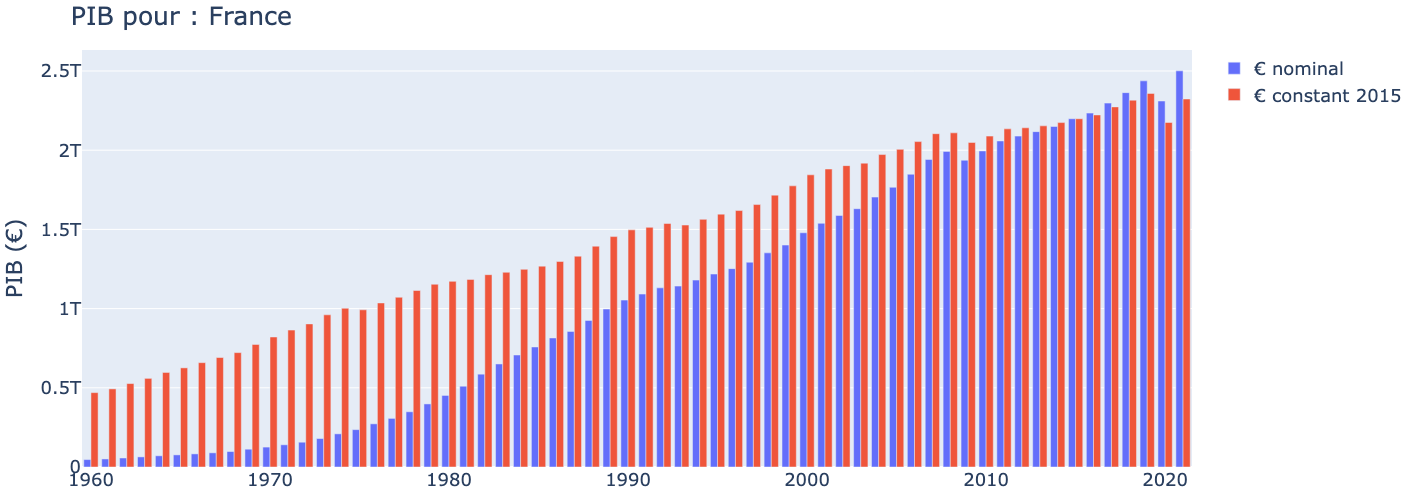

In [44]:
fig = go.Figure()

country = 'France'

label = '€ nominal'
fig.add_trace(go.Bar(x=data[label].index,y=data[label][country],name=label))
label = '€ constant 2015'
fig.add_trace(go.Bar(x=data[label].index,y=data[label][country],name=label))

fig.update_layout(title="PIB pour : " + country,
                  yaxis_title='PIB (€)',
                  width=1000,height=500,
                  font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )


fig.show()

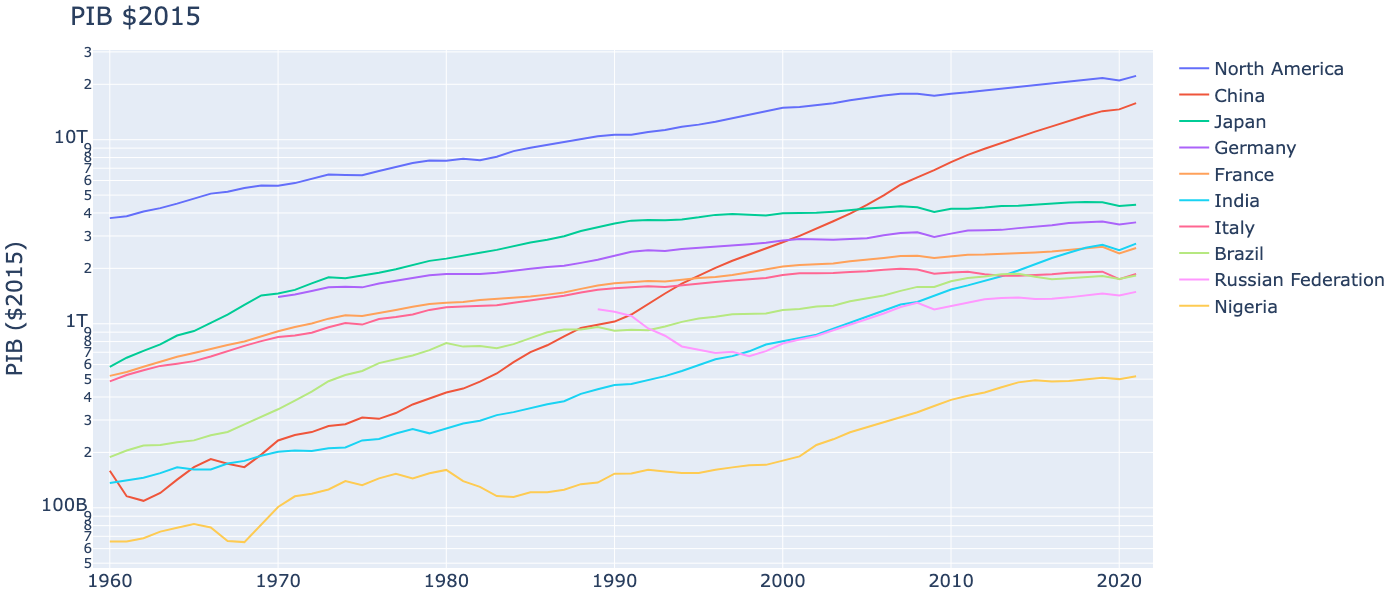

In [78]:
countries = ['North America','China','Japan','Germany','France','India','Italy','Brazil','Russian Federation','Nigeria']

fig = go.Figure()

for c in countries:
    fig.add_trace(go.Scatter(x=data['U.S. dollars 2015'].index,
                             y=data['U.S. dollars 2015'][c],name=c))

fig.update_layout(title="PIB $2015",
                  yaxis_title='PIB ($2015)',
                  xaxis=dict(range=['1959-01-01','2022-01-03']),
                  yaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10})


fig.show()


### Plotting PIB/POP

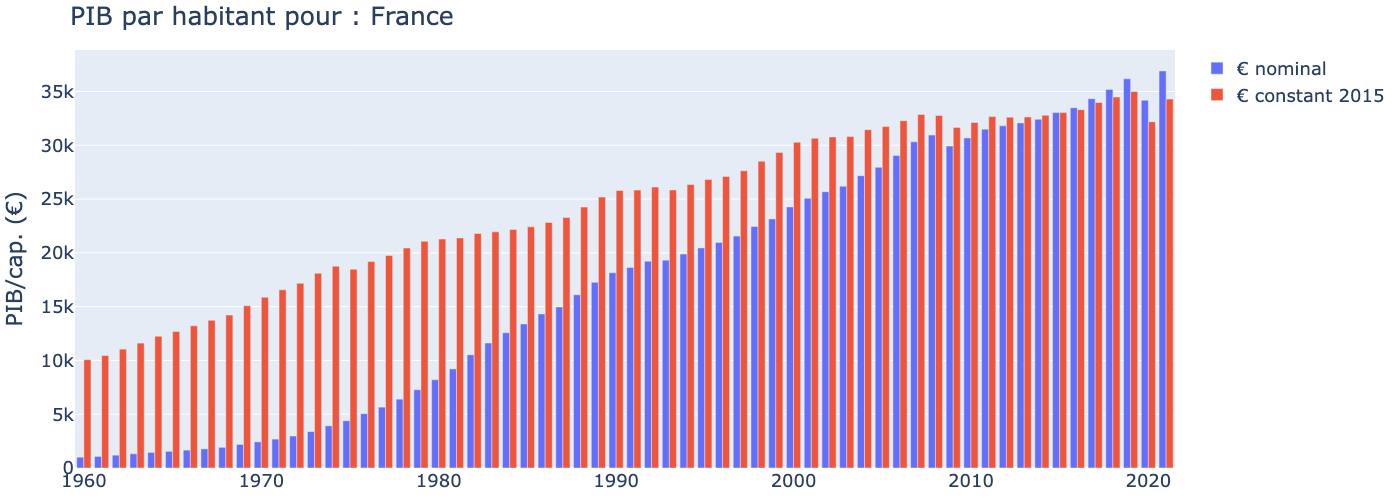

In [47]:
fig = go.Figure()

country = 'France'

label = '€ nominal'
fig.add_trace(go.Bar(x=data[label].index,y=data[label][country]/data_pop[country],name=label))
label = '€ constant 2015'
fig.add_trace(go.Bar(x=data[label].index,y=data[label][country]/data_pop[country],name=label))

fig.update_layout(title="PIB par habitant pour : " + country,
                  yaxis_title='PIB/cap. (€)',
                  width=1000,height=500,
                  font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}                  
                 )

fig.show()

# Comparaison internationale

In [3]:
#for col in data['constant 2017 PPP dollars'].columns:
#    print(col)


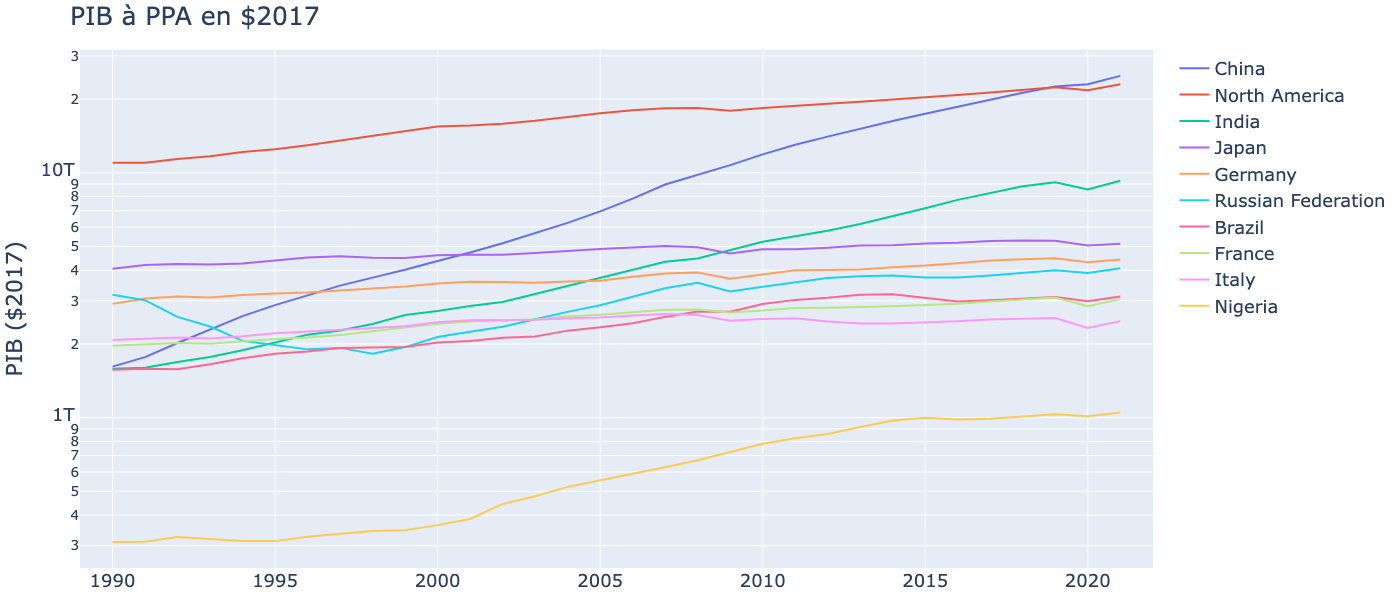

In [88]:
countries = ['China','North America','India','Japan','Germany','Russian Federation','Brazil','France','Italy','Nigeria']
#countries = ['North America','Germany','France','Turkiye','China','Brazil','Morocco','Pakistan','Nigeria','Zimbabwe']

fig = go.Figure()

for c in countries:
    fig.add_trace(go.Scatter(x=data['constant 2017 PPP dollars'].index,
                             y=data['constant 2017 PPP dollars'][c],name=c))

fig.update_layout(title="PIB à PPA en $2017",
                  yaxis_title='PIB ($2017)',
                  xaxis=dict(range=['1989-01-01','2022-01-03']),
                  yaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10})

fig.show()


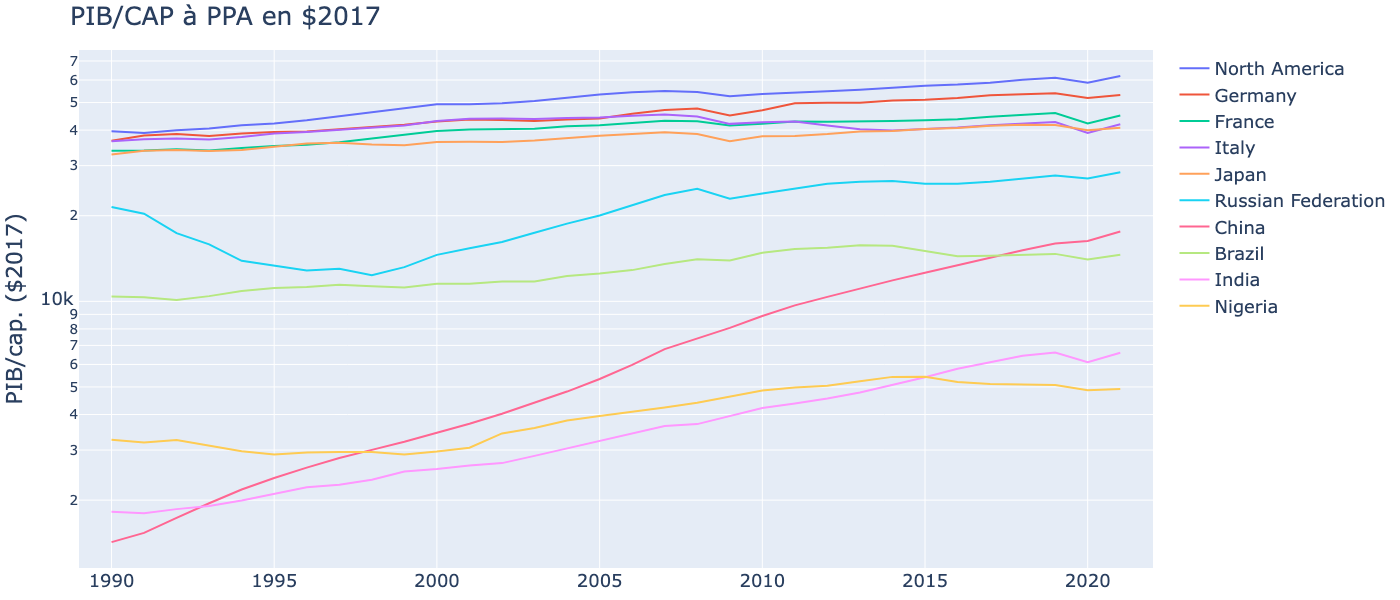

In [85]:
countries = ['North America','Germany','France','Italy','Japan','Russian Federation','China','Brazil','India','Nigeria']
#countries = ['North America','Germany','France','Turkiye','China','Brazil','Morocco','Pakistan','Nigeria','Zimbabwe']

fig = go.Figure()

for c in countries:
    fig.add_trace(go.Scatter(x=data['constant 2017 PPP dollars'].index,
                             y=data['constant 2017 PPP dollars'][c]/data_pop[c],name=c))

fig.update_layout(title="PIB/CAP à PPA en $2017",
                  yaxis_title='PIB/cap. ($2017)',
                  xaxis=dict(range=['1989-01-01','2022-01-03']),
                  yaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10})

fig.show()


In [ ]:
To do

- Croissance des 30 dernières années pour tous les pays

# Croissance du PIB

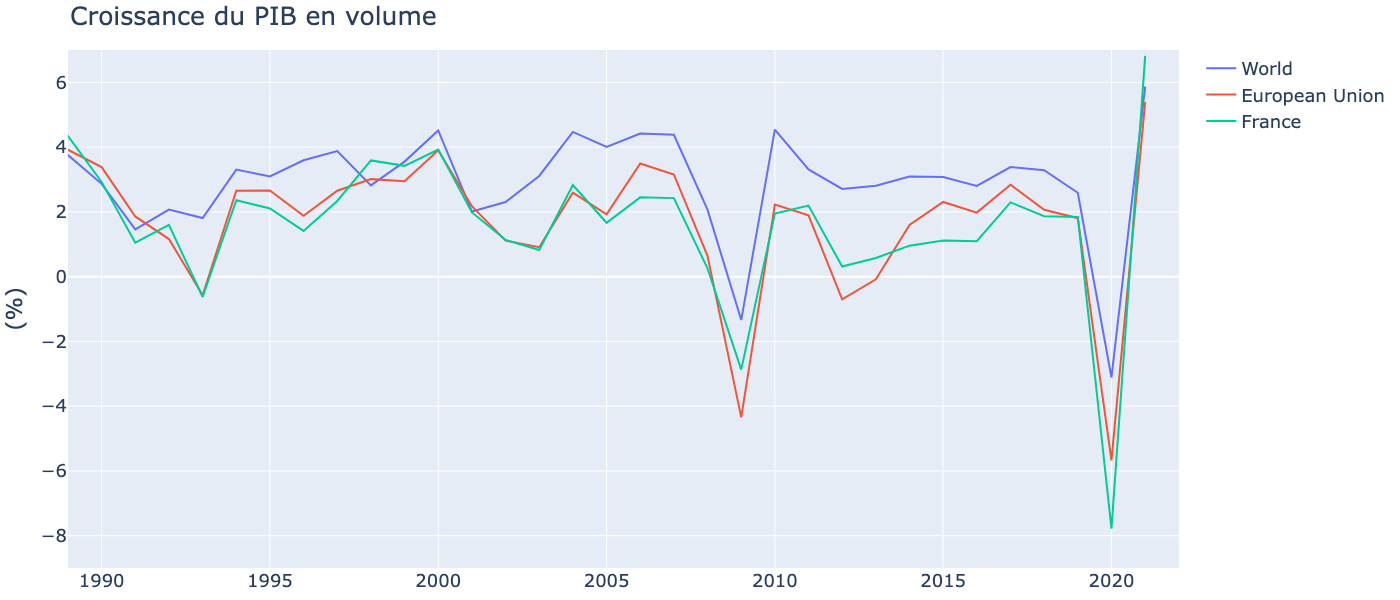

In [8]:
countries = ['World','European Union','France']
#countries = ['North America','Germany','France','Turkiye','China','Brazil','Morocco','Pakistan','Nigeria','Zimbabwe']

fig = go.Figure()

for c in countries:
    fig.add_trace(go.Scatter(x=data['gdp growth'].index,
                             y=data['gdp growth'][c],name=c))

fig.update_layout(title="Croissance du PIB en volume",
                  yaxis_title='(%)',
                  xaxis=dict(range=['1989-01-01','2022-01-03']),
                  yaxis=dict(range=[-9,7]),                  
#                  yaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10})

fig.show()


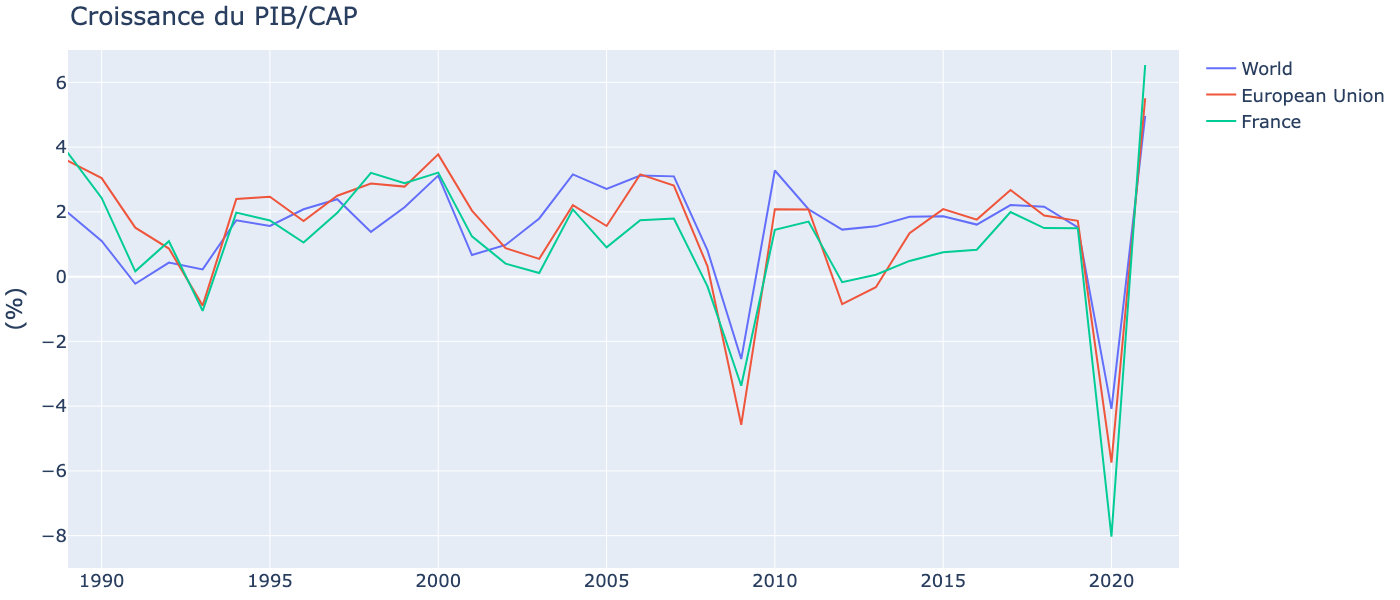

In [7]:
countries = ['World','European Union','France']
#countries = ['North America','Germany','France','Turkiye','China','Brazil','Morocco','Pakistan','Nigeria','Zimbabwe']

fig = go.Figure()

for c in countries:
    fig.add_trace(go.Scatter(x=data['gdp per cap growth'].index,
                             y=data['gdp per cap growth'][c],name=c))

fig.update_layout(title="Croissance du PIB/CAP",
                  yaxis_title='(%)',
                  xaxis=dict(range=['1989-01-01','2022-01-03']),
                  yaxis=dict(range=[-9,7]),
#                  yaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10})

fig.show()


# GDP correlation with Life Expectancy

In [60]:
df

,life expectancy,population,gdp ppp,gdp per cap
Country Name,,,,
Aruba,76.248000,106442.0,4.340760e+09,40780.516569
Africa Eastern and Southern,63.755674,667242712.0,2.434574e+12,3648.708762
Afghanistan,63.565000,37769499.0,7.855761e+10,2079.921861
Africa Western and Central,57.555796,454306063.0,1.859033e+12,4092.028643
Angola,62.448000,32353588.0,2.136121e+11,6602.423657
...,...,...,...,...
Samoa,72.157000,211905.0,1.344780e+09,6346.146335
Kosovo,79.022000,1788878.0,2.024735e+10,11318.462250
South Africa,66.175000,58087055.0,8.046338e+11,13852.205969


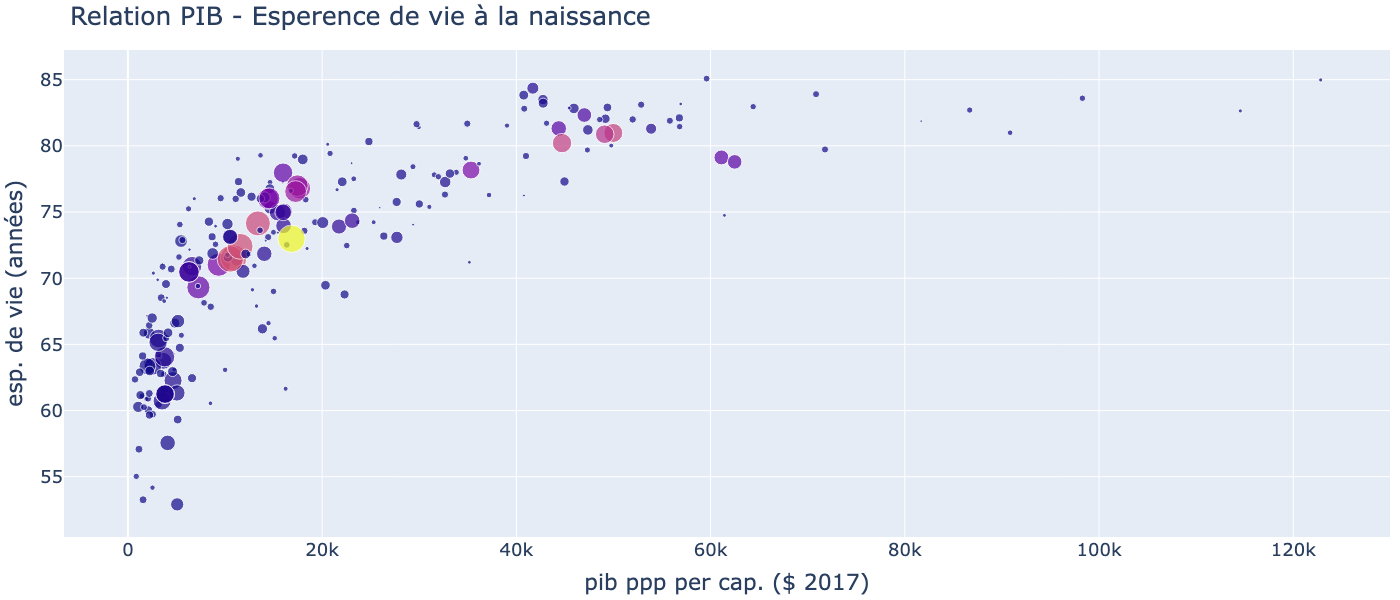

In [10]:
date = '2019-01-01'

s_le = pd.Series(data['life expectancy at birth'].loc[date], name='life expectancy')
s_pop = pd.Series(data['population'].loc[date], name='population')
s_gdp = pd.Series(data['constant 2017 PPP dollars'].loc[date], name='gdp ppp')
df = pd.concat([s_le,s_pop,s_gdp],axis=1).dropna()
df['gdp per cap'] = df['gdp ppp']/df['population']
##

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['gdp per cap'], y=df['life expectancy'],
                         mode='markers',
                         marker=dict(size=np.power(df['population']*2e-3,1/5),sizemode='diameter', sizeref=1,color = df['gdp ppp'],
#                                     colorbar=dict(title='gdp ppp'),colorscale='Viridis'
                                    ),
                         text=df.index
                         ))


    
    
fig.update_layout(title="Relation PIB - Esperence de vie à la naissance",
                  yaxis_title='esp. de vie (années)',
                  xaxis_title='pib ppp per cap. ($ 2017)',
#                  yaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )

fig.show()


# Corrélation PIB versus education

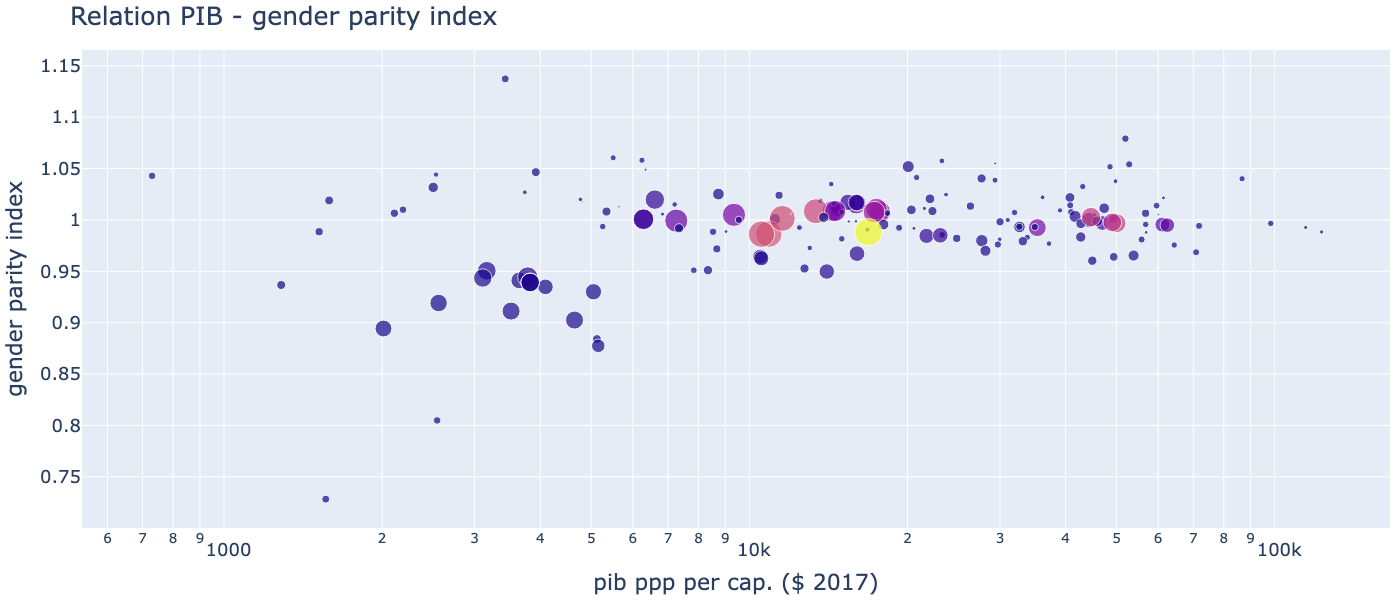

In [6]:
date = '2019-01-01'

s_exp = pd.Series(data['gender parity index'].loc[date], name='gender parity index')
s_pop = pd.Series(data['population'].loc[date], name='population')
s_gdp = pd.Series(data['constant 2017 PPP dollars'].loc[date], name='gdp ppp')
df = pd.concat([s_exp,s_pop,s_gdp],axis=1).dropna()
df['gdp per cap'] = df['gdp ppp']/df['population']
##

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['gdp per cap'], y=df['gender parity index'],
                         mode='markers',
                         marker=dict(size=np.power(df['population']*2e-3,1/5),sizemode='diameter', sizeref=1,color = df['gdp ppp'],
#                                     colorbar=dict(title='gdp ppp'),colorscale='Viridis'
                                    ),
                         text=df.index
                         ))


    
    
fig.update_layout(title="Relation PIB - gender parity index",
                  yaxis_title='gender parity index',
                  xaxis_title='pib ppp per cap. ($ 2017)',
                  xaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )

fig.show()


# Hapiness index

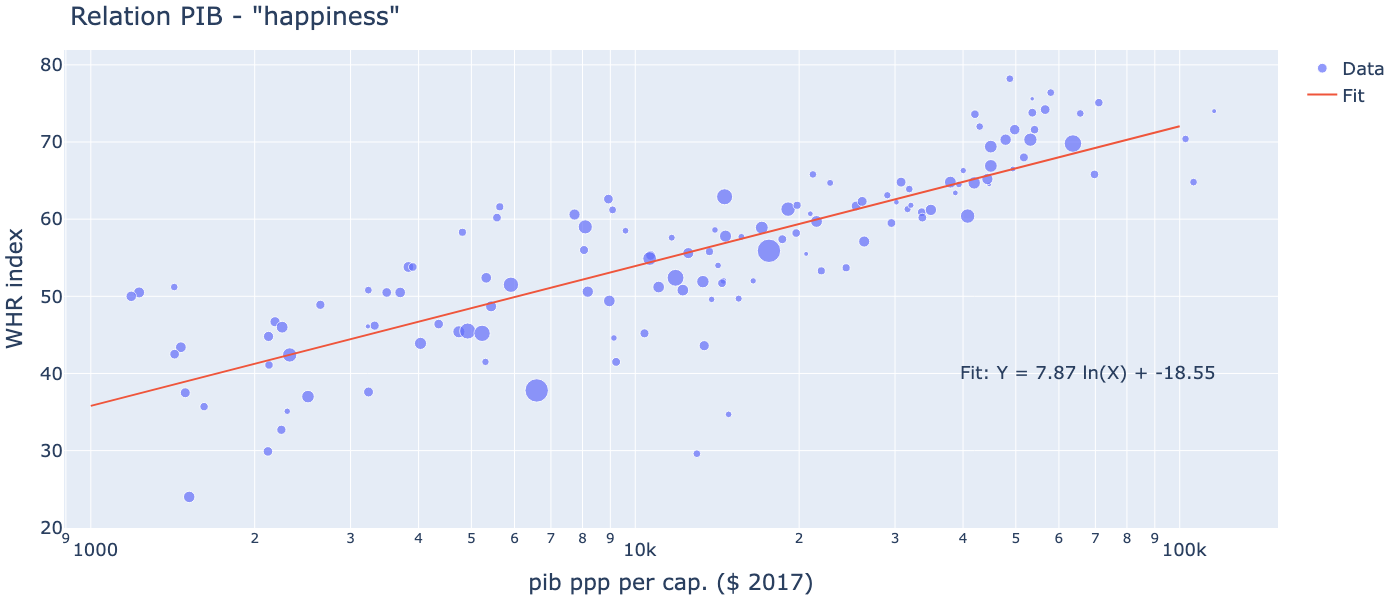

In [13]:
date = '2021-01-01'

s_whr = pd.Series(data['WHR index'].loc[date], name='WHR index')
s_pop = pd.Series(data['population'].loc[date], name='population')
s_gdp = pd.Series(data['constant 2017 PPP dollars'].loc[date], name='gdp ppp')
df = pd.concat([s_whr,s_pop,s_gdp],axis=1).dropna()
df['gdp per cap'] = df['gdp ppp']/df['population']
##

# Fit data by user log function
x_data = df['gdp per cap'].values
y_data = df['WHR index'].values

def f_fit(x, a, b):
    return a * np.log(x) + b
p0 = [1, 1]

params, params_covariance = curve_fit(f_fit, x_data, y_data, p0=p0)
x_fit = np.logspace(np.log10(1e3),np.log10(1e5),100)
y_fit = f_fit(x_fit,params[0],params[1])

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['gdp per cap'], y=df['WHR index'],
                         mode='markers',name='Data',
                         marker=dict(size=np.power(df['population']*5e-3,1/5),sizemode='diameter', sizeref=1,
#                                     color = df['gdp ppp'],colorbar=dict(title='gdp ppp'),colorscale='Viridis'
                                    ),
                         text=df.index
                         ))
fig.add_trace(go.Scatter(x=x_fit, y=y_fit,name = 'Fit'))
    
fig.update_layout(title="Relation PIB - \"happiness\"",
                  yaxis_title='WHR index',
                  xaxis_title='pib ppp per cap. ($ 2017)',
                  xaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )

fig.update_layout(annotations=[dict(x=0.95,y=0.3,xref='paper',yref='paper',
                                    text='Fit: Y = ' + str(format(params[0],'.2f')) + ' ln(X) + ' + str(format(params[1],'.2f')),
                                    showarrow=False)])

fig.show()


In [ ]:
date = '2021-01-01'

s_whr = pd.Series(data['WHR index'].loc[date], name='WHR index')
s_pop = pd.Series(data['population'].loc[date], name='population')
s_gdp = pd.Series(data['constant 2017 PPP dollars'].loc[date], name='gdp ppp')
df = pd.concat([s_whr,s_pop,s_gdp],axis=1).dropna()
df['gdp per cap'] = df['gdp ppp']/df['population']
##

# Fit data by user log function
x_data = df['gdp per cap'].values
y_data = df['WHR index'].values

def f_fit(x, a, b):
    return a * np.log(x) + b
p0 = [1, 1]

params, params_covariance = curve_fit(f_fit, x_data, y_data, p0=p0)
x_fit = np.logspace(np.log10(1e3),np.log10(1e5),100)
y_fit = f_fit(x_fit,params[0],params[1])

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['gdp per cap'], y=df['WHR index'],
                         mode='markers',name='Data',
                         marker=dict(size=np.power(df['population']*5e-3,1/5),sizemode='diameter', sizeref=1,
#                                     color = df['gdp ppp'],colorbar=dict(title='gdp ppp'),colorscale='Viridis'
                                    ),
                         text=df.index
                         ))
fig.add_trace(go.Scatter(x=x_fit, y=y_fit,name = 'Fit'))
    
fig.update_layout(title="Relation PIB - \"happiness\"",
                  yaxis_title='WHR index',
                  xaxis_title='pib ppp per cap. ($ 2017)',
                  xaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )

fig.update_layout(annotations=[dict(x=0.95,y=0.3,xref='paper',yref='paper',
                                    text='Fit: Y = ' + str(format(params[0],'.2f')) + ' ln(X) + ' + str(format(params[1],'.2f')),
                                    showarrow=False)])

fig.show()


# Human Development Index

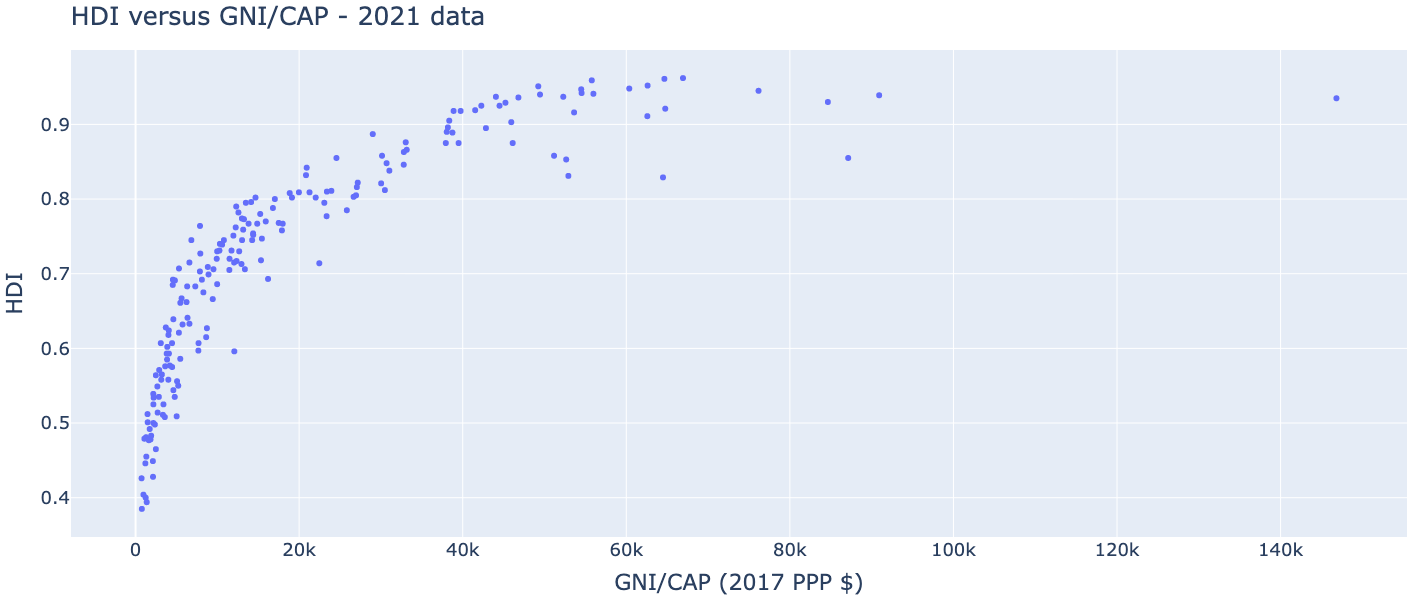

In [119]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['HDI']['Gross national income (GNI) per capita'],
                         y=data['HDI']['Human Development Index (HDI) '],
                         mode='markers',name='Data'))
    
fig.update_layout(title="HDI versus GNI/CAP - 2021 data",
                  yaxis_title='HDI',
                  xaxis_title='GNI/CAP (2017 PPP $)',
#                  xaxis=dict(type='log'),
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )

fig.show()


# Inegalités

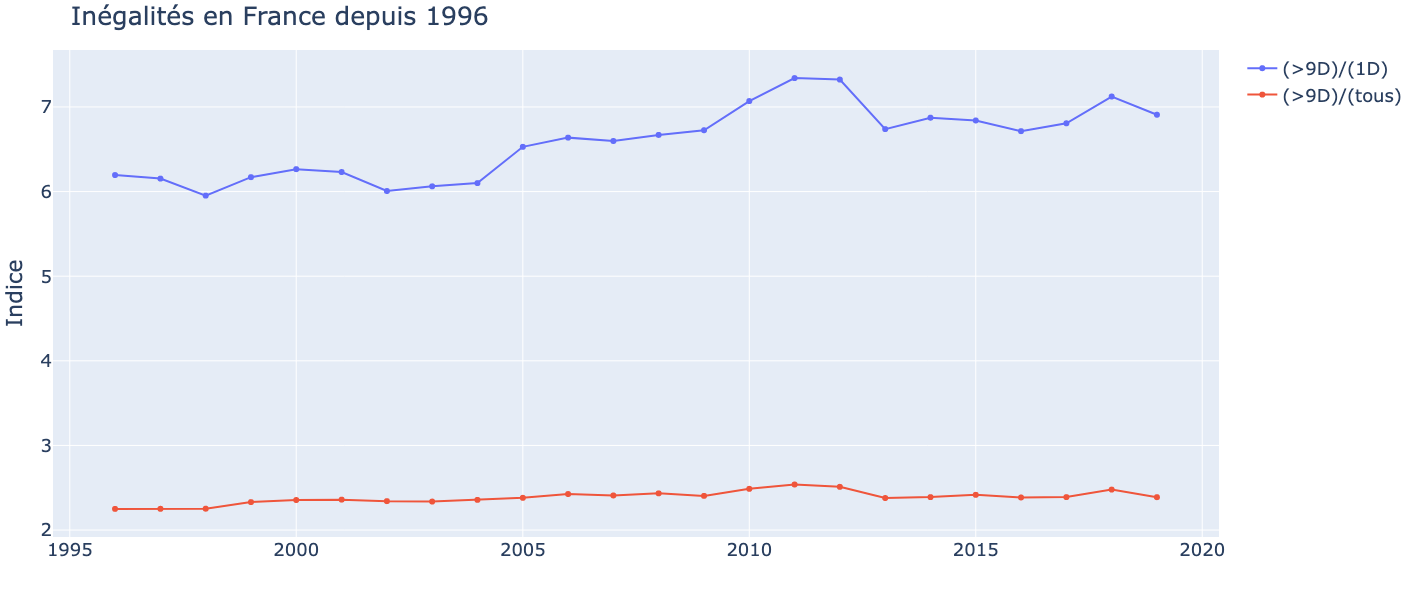

In [154]:
fig = go.Figure()

x = data['insee - niveau de vie'].index
y = data['insee - niveau de vie']['Rapport (B)/(A)3']
fig.add_trace(go.Scatter(x=x,y=y,mode='markers+lines',name='(>9D)/(1D)'))
y = data['insee - niveau de vie']['> 9e décile (B)'] / data['insee - niveau de vie']['Ensemble']
fig.add_trace(go.Scatter(x=x,y=y,mode='markers+lines',name='(>9D)/(tous)'))
    
fig.update_layout(title="Inégalités en France depuis 1996",
                  yaxis_title='Indice',
                  xaxis_title='',
                  width=1000,height=600,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )

fig.show()




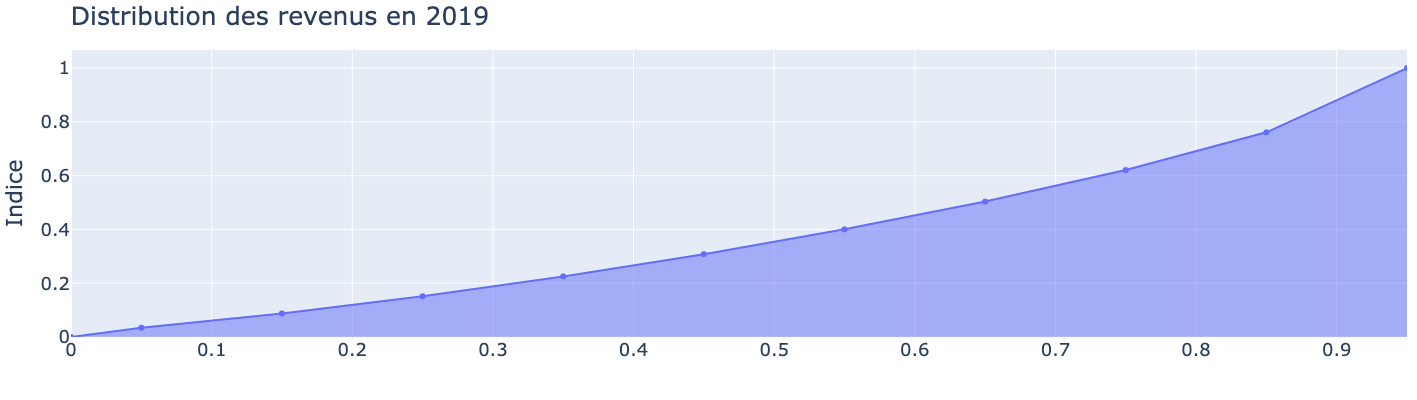

In [28]:
x = [0,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.0]
y = data['insee - niveau de vie'].loc['2019-01-01'][0:10].values / data['insee - niveau de vie'].loc['2019-01-01'][0:10].values.sum()
y_cumul = list(it.accumulate(y))
y_cumul.insert(0,0)
#y.insert(0,0)
#y.append()

#arr.insert(0, element)


fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=y_cumul,mode='markers+lines',fill='tozeroy'))
    
fig.update_layout(title="Distribution des revenus en 2019",
                  yaxis_title='Indice',
                  xaxis_title='',
                  width=1000,height=400,font=dict(size=18),
                  margin={"r": 10, "t": 50, "l": 10, "b": 10}
                 )



[0.03458270467720162,
 0.08742952433891844,
 0.1514333359803065,
 0.22532359247200823,
 0.30810767886921303,
 0.40042086873659966,
 0.5035337092035257,
 0.6209005002779321,
 0.7610974350829826,
 1.0]